In [1]:
import pandas as pd

In [2]:
df = pd.read_csv("air quality data.csv")

In [3]:
import numpy as np

In [4]:
column_name = 'pollutant_avg' 

# Calculate Q1, Q3, and IQR
Q1 = df[column_name].quantile(0.25)
Q3 = df[column_name].quantile(0.75)
IQR = Q3 - Q1

# Define outlier bounds
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Filter out the outliers
df_filtered = df[(df[column_name] >= lower_bound) & (df[column_name] <= upper_bound)]

# You can also use the capped approach
df_capped = df.copy()
df_capped[column_name] = np.where(df_capped[column_name] > upper_bound, upper_bound, df_capped[column_name])
df_capped[column_name] = np.where(df_capped[column_name] < lower_bound, lower_bound, df_capped[column_name])

In [5]:
print("Original DataFrame shape:", df.shape)
print("Filtered DataFrame shape:", df_filtered.shape)

Original DataFrame shape: (3271, 11)
Filtered DataFrame shape: (2895, 11)


In [6]:
import matplotlib.pyplot as plt
import seaborn as sns

In [7]:
numerical_cols = ['pollutant_min', 'pollutant_max', 'pollutant_avg', 'latitude', 'longitude']

VISUALIZATION BEFORE OUTLIER CAPPING


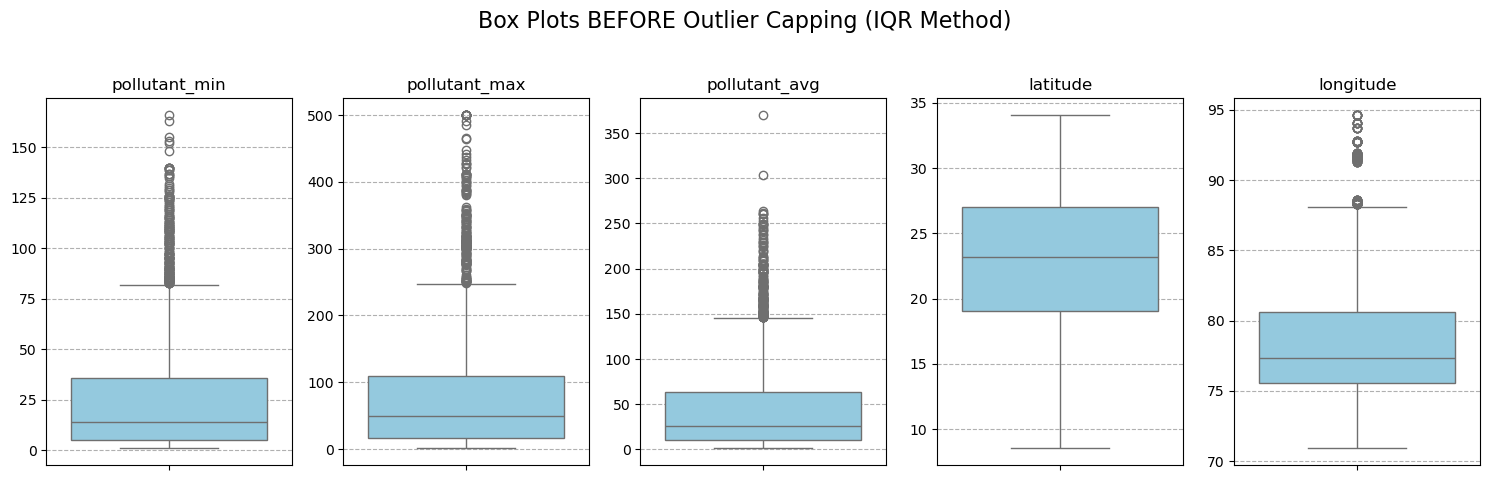

In [8]:
print("VISUALIZATION BEFORE OUTLIER CAPPING")
plt.figure(figsize=(15, 5))
plt.suptitle("Box Plots BEFORE Outlier Capping (IQR Method)", fontsize=16)

for i, col in enumerate(numerical_cols):
    plt.subplot(1, len(numerical_cols), i + 1)
    # Using Seaborn for better looking box plots
    sns.boxplot(y=df[col], orient='v', color='skyblue')
    plt.title(col)
    plt.ylabel('')
    plt.grid(axis='y', linestyle='--')

plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

In [9]:
import pandas as pd
import numpy as np

# Assuming 'df' is your DataFrame, loaded from 'air quality data.csv'
# Replace this line with your actual data loading if needed:
# df = pd.read_csv("air quality data.csv")

# List of numerical columns to check and handle outliers
numerical_cols = ['pollutant_min', 'pollutant_max', 'pollutant_avg', 'latitude', 'longitude']

for col in numerical_cols:
    print(f"--- Handling outliers in column: {col} ---")
    
    # Ensure the column is numeric, coercing any errors
    df[col] = pd.to_numeric(df[col], errors='coerce')
    
    # Drop rows where the column is NaN, as these cannot be processed
    df.dropna(subset=[col], inplace=True)
    
    # Calculate the first quartile (Q1) and third quartile (Q3)
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    
    # Calculate the Interquartile Range (IQR)
    IQR = Q3 - Q1
    
    # Define the lower and upper bounds for outlier detection
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    
    # Cap the outliers: replace values above the upper bound with the upper bound,
    # and values below the lower bound with the lower bound.
    df[col] = np.where(df[col] > upper_bound, upper_bound, df[col])
    df[col] = np.where(df[col] < lower_bound, lower_bound, df[col])

    print(f"Outliers in '{col}' have been capped. The DataFrame has been modified.")

print("\nOutlier handling process completed for all specified numerical columns.")

--- Handling outliers in column: pollutant_min ---
Outliers in 'pollutant_min' have been capped. The DataFrame has been modified.
--- Handling outliers in column: pollutant_max ---
Outliers in 'pollutant_max' have been capped. The DataFrame has been modified.
--- Handling outliers in column: pollutant_avg ---
Outliers in 'pollutant_avg' have been capped. The DataFrame has been modified.
--- Handling outliers in column: latitude ---
Outliers in 'latitude' have been capped. The DataFrame has been modified.
--- Handling outliers in column: longitude ---
Outliers in 'longitude' have been capped. The DataFrame has been modified.

Outlier handling process completed for all specified numerical columns.


VISUALIZATION AFTER OUTLIER CAPPING


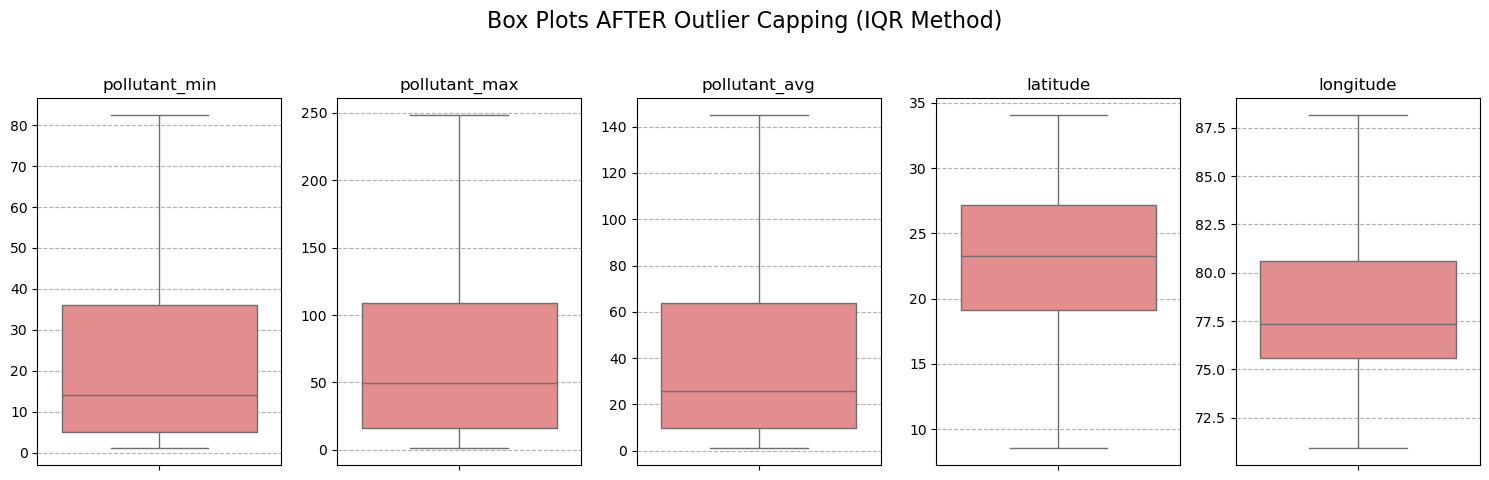

In [10]:
print("VISUALIZATION AFTER OUTLIER CAPPING")
plt.figure(figsize=(15, 5))
plt.suptitle("Box Plots AFTER Outlier Capping (IQR Method)", fontsize=16)

for i, col in enumerate(numerical_cols):
    plt.subplot(1, len(numerical_cols), i + 1)
    # Using Seaborn for better looking box plots
    sns.boxplot(y=df[col], orient='v', color='lightcoral') 
    plt.title(col)
    plt.ylabel('')
    plt.grid(axis='y', linestyle='--')

plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

In [11]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, r2_score

# Drop irrelevant columns that won't be used for prediction.
df.drop(['country', 'last_update', 'station'], axis=1, inplace=True)
# Remove any remaining rows with missing data.
df.dropna(inplace=True)

# --- Define Features and Target ---
# 'pollutant_avg' is the value we want to predict.
target = 'pollutant_avg'
# All other columns are our input features.
features = df.drop(columns=[target]).columns

X = df[features]
y = df[target]

# --- Preprocessing Pipeline Setup ---
# Separate numerical and categorical features for different transformations.
numerical_features = X.select_dtypes(include=np.number).columns.tolist()
categorical_features = X.select_dtypes(include='object').columns.tolist()

# Create a preprocessor to apply scaling and one-hot encoding.
preprocessor = ColumnTransformer(
    transformers=[
        # Apply StandardScaler to numerical features
        ('num', StandardScaler(), numerical_features),
        # Apply OneHotEncoder to categorical features
        ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_features)
    ])

# --- Data Splitting ---
# Split the data into training and testing sets.
# X_train and y_train are for training the model.
# X_test and y_test are for evaluating its performance.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# --- Create and Train the Model Pipeline ---
# Combine the preprocessing step with the Linear Regression model.
model_pipeline = Pipeline(steps=[('preprocessor', preprocessor),
                                ('regressor', LinearRegression())])

print("Training the model...")
model_pipeline.fit(X_train, y_train)
print("Model training complete.")

# --- Model Evaluation ---
# Make predictions on the test set.
y_pred = model_pipeline.predict(X_test)

# Calculate performance metrics.
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("\nModel Performance:")
print(f"Mean Absolute Error (MAE): {mae:.2f}")
print(f"R-squared (R2) Score: {r2:.2f}")

Training the model...
Model training complete.

Model Performance:
Mean Absolute Error (MAE): 7.45
R-squared (R2) Score: 0.93
